In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-09-08 07:50:04.020875: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open three different DataFrames, one for an extended parameter list, one with mean values over 3x3 pixels, and one with 3x3 gradients. 

# Then merge the two dataframes and use predictors from both.

# Open dict with collocated ASCAT data with extended parameters

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat_9000_images_ifs_extended.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df_extended = pd.concat(d.values(), ignore_index=True)
df_extended

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,f_usable_mid,f_usable_aft,f_kp_fore,f_kp_mid,f_kp_aft,f_land_fore,f_land_mid,f_land_aft,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,0.0,0.0,0.0,0.0,0.0,0.039,0.053,0.047,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,0.0,0.0,0.0,0.0,0.0,0.039,0.053,0.047,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,0.0,0.0,0.0,0.0,0.0,0.045,0.116,0.044,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,0.0,0.0,0.0,0.0,0.0,0.045,0.116,0.044,1.969399,1.141287
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,4.476319,0.497334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,9.854824,-1.954211
9994,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,7.869203,-2.273894
9995,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,7.593998,-2.340672
9996,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,7.223359,-1.862569


In [6]:
df_extended = df_extended.dropna(subset=['UWr', 'rhoair'])
df_extended

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,f_usable_mid,f_usable_aft,f_kp_fore,f_kp_mid,f_kp_aft,f_land_fore,f_land_mid,f_land_aft,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,0.0,0.0,0.0,0.0,0.0,0.039,0.053,0.047,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,0.0,0.0,0.0,0.0,0.0,0.039,0.053,0.047,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,0.0,0.0,0.0,0.0,0.0,0.045,0.116,0.044,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,0.0,0.0,0.0,0.0,0.0,0.045,0.116,0.044,1.969399,1.141287
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,4.476319,0.497334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,9.854824,-1.954211
9994,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,7.869203,-2.273894
9995,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,7.593998,-2.340672
9996,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,7.223359,-1.862569


In [7]:
df_extended = df_extended.sample(frac = 1, random_state=77)
df_extended     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,f_usable_mid,f_usable_aft,f_kp_fore,f_kp_mid,f_kp_aft,f_land_fore,f_land_mid,f_land_aft,u10,v10
9626,0.078067,-0.018678,308.009999,2485.276604,1021.886352,1023.132504,5.283941,5.307423,89.166352,88.956158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.958139,-1.545760
4101,0.455734,0.214497,342.430002,2485.382490,1009.739629,1010.974509,4.963379,5.000481,88.237874,87.991604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.971909,-4.344576
8683,-0.012150,-0.032903,348.149998,2482.060605,1010.236972,1011.460995,6.507286,6.503420,96.736003,96.881840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.204488,3.573421
6116,0.155169,-0.072199,376.110002,2449.791792,1012.087269,1013.244498,14.877578,14.933106,85.877700,85.194925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.136973,0.297775
4981,0.618789,0.095465,337.542105,2486.613571,1003.750346,1004.976852,5.077564,5.106566,88.221949,87.935179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.032828,-0.430503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9119,-0.203744,-0.248952,334.574997,2470.989855,994.680703,995.886502,4.406105,4.615132,69.006350,67.089942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.278823,-1.836160
7832,-0.012150,-0.032903,265.205005,2491.979453,989.732447,990.964005,2.700275,2.784448,65.272654,63.861253,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.810270,17.208559
9509,0.078067,-0.018678,334.165001,2481.488700,1006.442064,1007.660013,5.957429,6.000322,86.412503,85.791253,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.257064,9.131248
2283,-0.155996,-0.001206,294.130000,2482.470287,1023.041099,1024.315005,2.590541,2.709164,68.665147,66.956363,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.450890,-3.203395


# Open dict with collocated ASCAT data with mean values over 3x3 grid

In [8]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [9]:
with open(data_dir + 'collocated_dict_ascat_mean_3x3_9000_images_ifs.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [10]:
df_mean3x3 = pd.concat(d.values(), ignore_index=True)
df_mean3x3

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.237778,67.411110,22.719999,61.927776,50.788891,61.792221,20180403T030600Z,20180403T044758.125000Z,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.237778,67.411110,22.719999,61.927776,50.788891,61.792221,20180403T030600Z,20180403T044758.125000Z,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.634445,-98.663330,-52.694443,57.665554,46.183331,57.551105,20180404T042700Z,20180404T060858.125000Z,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.634445,-98.663330,-52.694443,57.665554,46.183331,57.551105,20180404T042700Z,20180404T060858.125000Z,1.969399,1.141287
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.230000,101.641106,146.938889,36.868889,27.528889,36.837780,20180404T175400Z,20180404T193258.125000Z,4.476319,0.497334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10210,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.353333,-57.936665,-102.671112,59.132221,48.085556,59.247776,20200121T132400Z,20200121T150558.125000Z,9.854824,-1.954211
10211,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.097778,60.434441,15.702221,52.826668,41.831108,52.777779,20200121T200600Z,20200121T214758.125000Z,7.869203,-2.273894
10212,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.097778,60.434441,15.702221,52.826668,41.831108,52.777779,20200121T200600Z,20200121T214758.125000Z,7.593998,-2.340672
10213,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.220001,-99.427780,-53.618889,51.765553,40.707779,51.669998,20200121T214800Z,20200121T232958.125000Z,7.223359,-1.862569


In [11]:
df_mean3x3 = df_mean3x3.dropna(subset=['UWr', 'rhoair'])
df_mean3x3

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.237778,67.411110,22.719999,61.927776,50.788891,61.792221,20180403T030600Z,20180403T044758.125000Z,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.237778,67.411110,22.719999,61.927776,50.788891,61.792221,20180403T030600Z,20180403T044758.125000Z,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.634445,-98.663330,-52.694443,57.665554,46.183331,57.551105,20180404T042700Z,20180404T060858.125000Z,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.634445,-98.663330,-52.694443,57.665554,46.183331,57.551105,20180404T042700Z,20180404T060858.125000Z,1.969399,1.141287
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.230000,101.641106,146.938889,36.868889,27.528889,36.837780,20180404T175400Z,20180404T193258.125000Z,4.476319,0.497334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10210,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.353333,-57.936665,-102.671112,59.132221,48.085556,59.247776,20200121T132400Z,20200121T150558.125000Z,9.854824,-1.954211
10211,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.097778,60.434441,15.702221,52.826668,41.831108,52.777779,20200121T200600Z,20200121T214758.125000Z,7.869203,-2.273894
10212,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.097778,60.434441,15.702221,52.826668,41.831108,52.777779,20200121T200600Z,20200121T214758.125000Z,7.593998,-2.340672
10213,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.220001,-99.427780,-53.618889,51.765553,40.707779,51.669998,20200121T214800Z,20200121T232958.125000Z,7.223359,-1.862569


In [12]:
df_mean3x3 = df_mean3x3.sample(frac = 1, random_state=77)
df_mean3x3

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
3175,0.009946,-0.040725,251.644999,2488.538111,1010.165888,1011.414993,2.023150,2.102516,44.113950,42.683681,...,53.956665,99.791107,145.563339,52.277775,41.104446,52.305553,20161028T122100Z,20161028T135958.125000Z,15.144855,-2.822690
5169,-0.027121,0.194371,239.635000,2487.032256,998.520588,999.752997,3.178341,3.271420,66.910311,65.581157,...,70.139999,114.791107,159.307770,49.006664,38.250000,48.833328,20160914T132400Z,20160914T150558.125000Z,8.358912,5.857295
911,-0.002550,0.047334,365.990002,2470.313919,1016.734566,1017.941489,9.171636,9.150481,97.994251,98.260211,...,-144.827774,-98.895554,-52.968887,56.699997,45.240002,56.580002,20160901T042700Z,20160901T060858.125000Z,1.758566,-1.261437
2467,-0.112423,-0.138597,318.864999,2484.770831,1004.801770,1006.039008,3.824792,3.934362,79.711996,78.629340,...,-145.418884,-99.666664,-53.930000,53.176666,41.901112,53.065552,20180321T005100Z,20180321T023258.125000Z,4.061894,-9.476074
1305,0.090287,0.021701,334.275000,2472.734501,1018.892789,1020.097504,8.773203,8.746292,87.496500,87.088105,...,-146.167496,-100.784996,-55.379997,44.070000,33.764999,43.982498,20170113T003600Z,20170113T021758.125000Z,1.902182,-2.111862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7832,-0.012150,-0.032903,255.695001,2491.591320,1016.959958,1018.225497,2.193931,2.288993,54.886954,53.067623,...,-19.026665,-63.754440,-108.813324,40.072220,30.377777,40.324448,20210123T133900Z,20210123T152058.125000Z,7.729342,1.375466
9509,0.067179,-0.072297,334.020003,2476.432567,1003.534996,1004.743500,6.920789,6.950604,91.900203,91.827979,...,53.567776,99.418884,145.202209,52.582222,41.386665,52.604443,20190819T115100Z,20190819T130258.125000Z,8.472304,4.346781
2283,-0.001104,0.040936,266.884998,2482.950819,1010.863999,1012.084000,4.619135,4.734795,66.192197,64.257764,...,55.698887,101.027779,146.303329,41.101112,31.166664,41.110001,20180120T140600Z,20180120T154758.125000Z,0.534965,2.769807
10196,0.078067,-0.018678,245.715002,2491.537245,1003.469848,1004.726501,2.997655,3.071019,83.056952,82.119077,...,-147.272507,-101.732498,-56.191250,44.463745,34.074997,44.376247,20200117T213000Z,20200117T231158.125000Z,14.079101,1.822556


### Rename columns so that we can recognize them after merging

In [13]:
df_mean3x3 = df_mean3x3.rename(
    columns={
        'sigma0_trip_fore': 'sigma0_trip_fore_mean3x3', 
        'sigma0_trip_mid': 'sigma0_trip_mid_mean3x3',
        'sigma0_trip_aft': 'sigma0_trip_aft_mean3x3',
        'azi_angle_trip_fore': 'azi_angle_trip_fore_mean3x3',
        'azi_angle_trip_mid': 'azi_angle_trip_mid_mean3x3', 
        'azi_angle_trip_aft': 'azi_angle_trip_aft_mean3x3',
        'inc_angle_trip_fore': 'inc_angle_trip_fore_mean3x3', 
        'inc_angle_trip_mid': 'inc_angle_trip_mid_mean3x3', 
        'inc_angle_trip_aft': 'inc_angle_trip_aft_mean3x3',
        'start_sensing_time': 'start_sensing_time_mean3x3',
        'stop_sensing_time': 'stop_sensing_time_mean3x3'
    }
)

In [14]:
df_mean3x3

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore_mean3x3,azi_angle_trip_mid_mean3x3,azi_angle_trip_aft_mean3x3,inc_angle_trip_fore_mean3x3,inc_angle_trip_mid_mean3x3,inc_angle_trip_aft_mean3x3,start_sensing_time_mean3x3,stop_sensing_time_mean3x3,u10,v10
3175,0.009946,-0.040725,251.644999,2488.538111,1010.165888,1011.414993,2.023150,2.102516,44.113950,42.683681,...,53.956665,99.791107,145.563339,52.277775,41.104446,52.305553,20161028T122100Z,20161028T135958.125000Z,15.144855,-2.822690
5169,-0.027121,0.194371,239.635000,2487.032256,998.520588,999.752997,3.178341,3.271420,66.910311,65.581157,...,70.139999,114.791107,159.307770,49.006664,38.250000,48.833328,20160914T132400Z,20160914T150558.125000Z,8.358912,5.857295
911,-0.002550,0.047334,365.990002,2470.313919,1016.734566,1017.941489,9.171636,9.150481,97.994251,98.260211,...,-144.827774,-98.895554,-52.968887,56.699997,45.240002,56.580002,20160901T042700Z,20160901T060858.125000Z,1.758566,-1.261437
2467,-0.112423,-0.138597,318.864999,2484.770831,1004.801770,1006.039008,3.824792,3.934362,79.711996,78.629340,...,-145.418884,-99.666664,-53.930000,53.176666,41.901112,53.065552,20180321T005100Z,20180321T023258.125000Z,4.061894,-9.476074
1305,0.090287,0.021701,334.275000,2472.734501,1018.892789,1020.097504,8.773203,8.746292,87.496500,87.088105,...,-146.167496,-100.784996,-55.379997,44.070000,33.764999,43.982498,20170113T003600Z,20170113T021758.125000Z,1.902182,-2.111862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7832,-0.012150,-0.032903,255.695001,2491.591320,1016.959958,1018.225497,2.193931,2.288993,54.886954,53.067623,...,-19.026665,-63.754440,-108.813324,40.072220,30.377777,40.324448,20210123T133900Z,20210123T152058.125000Z,7.729342,1.375466
9509,0.067179,-0.072297,334.020003,2476.432567,1003.534996,1004.743500,6.920789,6.950604,91.900203,91.827979,...,53.567776,99.418884,145.202209,52.582222,41.386665,52.604443,20190819T115100Z,20190819T130258.125000Z,8.472304,4.346781
2283,-0.001104,0.040936,266.884998,2482.950819,1010.863999,1012.084000,4.619135,4.734795,66.192197,64.257764,...,55.698887,101.027779,146.303329,41.101112,31.166664,41.110001,20180120T140600Z,20180120T154758.125000Z,0.534965,2.769807
10196,0.078067,-0.018678,245.715002,2491.537245,1003.469848,1004.726501,2.997655,3.071019,83.056952,82.119077,...,-147.272507,-101.732498,-56.191250,44.463745,34.074997,44.376247,20200117T213000Z,20200117T231158.125000Z,14.079101,1.822556


In [15]:
df_extended['start_sensing_time']

9626    20191018T122400Z
4101    20151216T131800Z
8683    20210703T221800Z
6116    20170906T005100Z
4981    20160825T133900Z
              ...       
9119    20181127T232700Z
7832    20210223T120600Z
9509    20190926T202700Z
2283    20180208T151200Z
8799    20210724T123300Z
Name: start_sensing_time, Length: 9998, dtype: object

In [16]:
df_extended['lat']

9626    59.9337
4101   -54.4041
8683    59.9337
6116    40.1334
4981   -54.4041
         ...   
9119    40.1334
7832    59.9337
9509    59.9337
2283    40.1334
8799    59.9337
Name: lat, Length: 9998, dtype: float64

# DataFrame with gradients

In [17]:
with open(data_dir + 'collocated_dict_ascat_gradient_7x7_9000_images_ifs.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [18]:
df_grad = pd.concat(d.values(), ignore_index=True)
df_grad

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,1.969399,1.141287
4,-0.181195,-0.211426,333.339998,2477.183924,1013.350947,1014.568500,6.500048,6.570197,85.631549,84.863134,...,113.699997,68.889999,24.059999,54.570000,43.459999,54.509998,20180405T030600Z,20180405T044758.125000Z,4.360941,1.169768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6788,0.078067,-0.018678,310.069994,2491.647426,997.185190,998.412506,4.373226,4.400169,85.412753,84.989054,...,54.549999,100.279999,145.940002,49.439999,38.480000,49.480000,20200121T114500Z,20200121T132358.125000Z,9.761609,-1.152873
6789,0.078067,-0.018678,299.200002,2491.674058,996.891473,998.120007,4.291631,4.320973,85.900303,85.518713,...,52.619999,98.610001,144.559998,55.549999,44.049999,55.289997,20200121T121500Z,20200121T135658.125000Z,9.660257,-1.935741
6790,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,9.854824,-1.954211
6791,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,7.869203,-2.273894


In [19]:
df_grad = df_grad.dropna(subset=['UWr', 'rhoair'])
df_grad

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,1.969399,1.141287
4,-0.181195,-0.211426,333.339998,2477.183924,1013.350947,1014.568500,6.500048,6.570197,85.631549,84.863134,...,113.699997,68.889999,24.059999,54.570000,43.459999,54.509998,20180405T030600Z,20180405T044758.125000Z,4.360941,1.169768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6788,0.078067,-0.018678,310.069994,2491.647426,997.185190,998.412506,4.373226,4.400169,85.412753,84.989054,...,54.549999,100.279999,145.940002,49.439999,38.480000,49.480000,20200121T114500Z,20200121T132358.125000Z,9.761609,-1.152873
6789,0.078067,-0.018678,299.200002,2491.674058,996.891473,998.120007,4.291631,4.320973,85.900303,85.518713,...,52.619999,98.610001,144.559998,55.549999,44.049999,55.289997,20200121T121500Z,20200121T135658.125000Z,9.660257,-1.935741
6790,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,9.854824,-1.954211
6791,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,7.869203,-2.273894


In [20]:
df_grad = df_grad.sample(frac = 1, random_state=77)
df_grad     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
4534,-0.032881,-0.066335,354.930002,2477.523802,1010.124221,1011.345984,6.432838,6.461757,92.931653,92.958873,...,104.970001,60.309998,15.460000,51.279999,40.430000,51.439999,20200820T204800Z,20200820T222958.125000Z,-2.642549,7.299494
5884,-0.012150,-0.032903,348.509998,2482.583433,1021.666886,1022.909000,6.068217,6.072566,97.047853,97.260236,...,-13.809999,-58.389999,-102.989998,56.809998,45.770000,56.840000,20210623T140300Z,20210623T154158.125000Z,5.202958,2.503247
3130,-0.096742,-0.256058,339.840001,2483.598756,1025.167843,1026.423999,4.543451,4.578594,84.707887,84.525992,...,-162.129990,-117.559998,-73.000000,57.899998,46.879997,58.020000,20160429T041200Z,20160429T055358.125000Z,10.657385,1.380908
6536,0.078067,-0.018678,294.884998,2485.349514,1021.140943,1022.386508,5.228528,5.256178,88.630352,88.358336,...,54.949997,100.769997,146.470001,48.789997,37.829998,48.779999,20191018T122400Z,20191018T140558.125000Z,-4.786852,1.289569
929,0.107764,-0.173369,289.199998,2473.510835,1024.593900,1025.824005,6.092995,6.199298,80.796299,79.978310,...,55.049999,100.529999,145.929993,46.349998,35.719997,46.360001,20170113T140900Z,20170113T154758.125000Z,1.247879,-4.239812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,0.186782,0.418307,344.035001,2475.432878,1003.980576,1005.183505,7.748592,7.755491,96.237098,96.393674,...,51.689999,97.939995,144.000000,61.419998,49.980000,61.459999,20181128T172700Z,20181128T190558.125000Z,-2.082352,1.240975
2283,0.009946,-0.040725,322.300003,2489.425464,1009.137351,1010.379510,4.343677,4.379457,86.171650,85.833879,...,49.629997,96.139999,142.479996,62.910000,51.419998,62.949997,20170601T120600Z,20170601T134458.125000Z,-4.695946,7.894032
2004,0.009946,-0.040725,280.895001,2487.212276,1022.817826,1024.076505,4.476766,4.494666,89.290650,89.316839,...,53.320000,99.239998,145.089996,54.149998,42.879997,54.189999,20161102T121800Z,20161102T135658.125000Z,3.060370,-6.322997
3668,0.027770,0.144815,343.004994,2486.506486,1003.208213,1004.435010,5.574504,5.574473,98.219436,98.477885,...,-161.319992,-116.739998,-72.180000,56.239998,45.250000,56.340000,20161025T040900Z,20161025T055358.125000Z,6.032160,-8.511133


# Merge

In [21]:
merged_df = pd.merge(df_extended, df_mean3x3)
merged_df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,sigma0_trip_mid_mean3x3,sigma0_trip_aft_mean3x3,azi_angle_trip_fore_mean3x3,azi_angle_trip_mid_mean3x3,azi_angle_trip_aft_mean3x3,inc_angle_trip_fore_mean3x3,inc_angle_trip_mid_mean3x3,inc_angle_trip_aft_mean3x3,start_sensing_time_mean3x3,stop_sensing_time_mean3x3
0,0.078067,-0.018678,308.009999,2485.276604,1021.886352,1023.132504,5.283941,5.307423,89.166352,88.956158,...,-19.921255,-23.608553,54.789997,100.627777,146.345551,49.264442,38.259998,49.257774,20191018T122400Z,20191018T140558.125000Z
1,0.455734,0.214497,342.430002,2485.382490,1009.739629,1010.974509,4.963379,5.000481,88.237874,87.991604,...,-17.551456,-16.258373,71.329994,115.860001,160.311096,53.189999,42.216667,53.020000,20151216T131800Z,20151216T145958.125000Z
2,-0.012150,-0.032903,348.149998,2482.060605,1010.236972,1011.460995,6.507286,6.503420,96.736003,96.881840,...,-15.288120,-21.794518,-146.845566,-101.122223,-55.456665,46.481110,35.822220,46.347775,20210703T221800Z,20210703T235958.125000Z
3,0.155169,-0.072199,376.110002,2449.791792,1012.087269,1013.244498,14.877578,14.933106,85.877700,85.194925,...,-20.313808,-21.890211,-144.764282,-98.944283,-53.061428,57.432854,46.107143,57.335716,20170906T005100Z,20170906T023258.125000Z
4,0.618789,0.095465,337.542105,2486.613571,1003.750346,1004.976852,5.077564,5.106566,88.221949,87.935179,...,-8.957937,-16.119785,67.684448,112.367775,156.937775,37.176662,27.869999,37.009998,20160825T133900Z,20160825T151758.125000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,-0.203744,-0.248952,334.574997,2470.989855,994.680703,995.886502,4.406105,4.615132,69.006350,67.089942,...,-10.590591,-15.163862,115.646660,70.779999,25.855555,50.425552,39.767776,50.381107,20181127T232700Z,20181128T011158.125000Z
9994,-0.012150,-0.032903,265.205005,2491.979453,989.732447,990.964005,2.700275,2.784448,65.272654,63.861253,...,-18.377037,-16.504398,49.649998,96.159996,142.502228,62.919998,51.421108,62.944443,20210223T120600Z,20210223T134458.125000Z
9995,0.078067,-0.018678,334.165001,2481.488700,1006.442064,1007.660013,5.957429,6.000322,86.412503,85.791253,...,-16.789581,-19.362862,107.342216,62.621109,17.794443,44.781113,34.416668,44.742222,20190926T202700Z,20190926T220858.125000Z
9996,-0.155996,-0.001206,294.130000,2482.470287,1023.041099,1024.315005,2.590541,2.709164,68.665147,66.956363,...,-18.205040,-23.426067,-24.666666,-69.433327,-114.269989,59.549995,48.476665,59.629997,20180208T151200Z,20180208T165058.125000Z


In [22]:
merged_df = pd.merge(merged_df, df_grad)
merged_df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,inc_angle_trip_mid_mean3x3,inc_angle_trip_aft_mean3x3,start_sensing_time_mean3x3,stop_sensing_time_mean3x3,sigma0_trip_fore_x,sigma0_trip_mid_x,sigma0_trip_aft_x,sigma0_trip_fore_y,sigma0_trip_mid_y,sigma0_trip_aft_y
0,0.078067,-0.018678,308.009999,2485.276604,1021.886352,1023.132504,5.283941,5.307423,89.166352,88.956158,...,38.259998,49.257774,20191018T122400Z,20191018T140558.125000Z,0.580929,2.388872,3.084324,-2.821222,-0.960644,-1.710934
1,0.455734,0.214497,342.430002,2485.382490,1009.739629,1010.974509,4.963379,5.000481,88.237874,87.991604,...,42.216667,53.020000,20151216T131800Z,20151216T145958.125000Z,-2.269865,0.860500,-0.902723,1.125799,3.051105,1.752131
2,0.618789,0.095465,337.542105,2486.613571,1003.750346,1004.976852,5.077564,5.106566,88.221949,87.935179,...,27.869999,37.009998,20160825T133900Z,20160825T151758.125000Z,0.338940,0.398772,0.598228,1.453727,0.837183,0.599088
3,-0.404968,-0.436143,372.839998,2466.864709,1023.829957,1025.037982,8.287720,8.411893,80.428049,79.136029,...,45.839996,57.257778,20180701T173000Z,20180701T191158.125000Z,15.386411,14.905149,11.936886,0.974943,0.735687,0.709891
4,-0.186322,-0.352165,371.755002,2476.421565,1019.565222,1020.783990,8.127470,8.074241,97.705649,97.934711,...,36.357773,46.901108,20180722T183600Z,20180722T201758.125000Z,3.930861,1.746998,6.407451,-9.000047,-6.993793,-5.685732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6788,0.651738,0.318320,294.566661,2485.996341,989.324573,990.536662,4.561253,4.613209,82.248584,81.734863,...,42.751114,54.051105,20160719T144500Z,20160719T162358.125000Z,1.426809,-2.205329,-4.546013,-0.672461,0.432261,1.402555
6789,-0.012150,-0.032903,265.205005,2491.979453,989.732447,990.964005,2.700275,2.784448,65.272654,63.861253,...,51.421108,62.944443,20210223T120600Z,20210223T134458.125000Z,0.272501,1.182877,1.024220,1.269001,-0.478813,-0.327351
6790,0.078067,-0.018678,334.165001,2481.488700,1006.442064,1007.660013,5.957429,6.000322,86.412503,85.791253,...,34.416668,44.742222,20190926T202700Z,20190926T220858.125000Z,15.859289,11.226525,10.628944,-8.863070,-8.802871,-10.382540
6791,-0.155996,-0.001206,294.130000,2482.470287,1023.041099,1024.315005,2.590541,2.709164,68.665147,66.956363,...,48.476665,59.629997,20180208T151200Z,20180208T165058.125000Z,-1.088120,-2.438103,-0.648809,-1.741302,-1.811386,-3.346643


In [23]:
df = merged_df

# _______________________________________________________________________________
# Remove the flags from the predictors
# ________________________________________________________________________________

# Drop data with poor quality

## F_usable == 2 is bad
## F_kp == 1 is bad

In [24]:
df.loc[df['f_usable_fore'] == 2, 'sigma0_trip_fore'] =  df['sigma0_trip_fore'].mean()
df.loc[df['f_usable_mid'] == 2, 'sigma0_trip_mid'] = np.nan
df.loc[df['f_usable_aft'] == 2, 'sigma0_trip_aft'] = np.nan

df.loc[df['f_kp_fore'] == 1, 'sigma0_trip_fore'] = np.nan
df.loc[df['f_kp_mid'] == 1, 'sigma0_trip_mid'] = np.nan
df.loc[df['f_kp_aft'] == 1, 'sigma0_trip_aft'] = np.nan

df.loc[df['f_land_fore'] == 1, 'sigma0_trip_fore'] = np.nan
df.loc[df['f_land_mid'] == 1, 'sigma0_trip_mid'] = np.nan
df.loc[df['f_land_aft'] == 1, 'sigma0_trip_aft'] = np.nan

In [25]:
df[['sigma0_trip_fore','sigma0_trip_mid', 'sigma0_trip_aft']].isna().sum()

sigma0_trip_fore    61
sigma0_trip_mid     50
sigma0_trip_aft     80
dtype: int64

In [26]:
(df[['f_usable_fore','f_usable_mid', 'f_usable_aft']] == 2).sum()

f_usable_fore    9
f_usable_mid     9
f_usable_aft     9
dtype: int64

In [27]:
(df[['f_kp_fore','f_kp_mid', 'f_kp_aft']] == 1).sum()

f_kp_fore    0
f_kp_mid     0
f_kp_aft     0
dtype: int64

In [28]:
(df[['f_land_fore','f_land_mid', 'f_land_aft']] == 1).sum()

f_land_fore    61
f_land_mid     41
f_land_aft     71
dtype: int64

In [29]:
for c in df.columns:
    if df[c].isna().sum()>0:
        print(c)

rain
sigma0_trip_fore
sigma0_trip_mid
sigma0_trip_aft


In [30]:
df = df.drop(['rain'], axis=1)

In [31]:
df=df.dropna()

In [32]:
df.shape

(6713, 96)

In [33]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

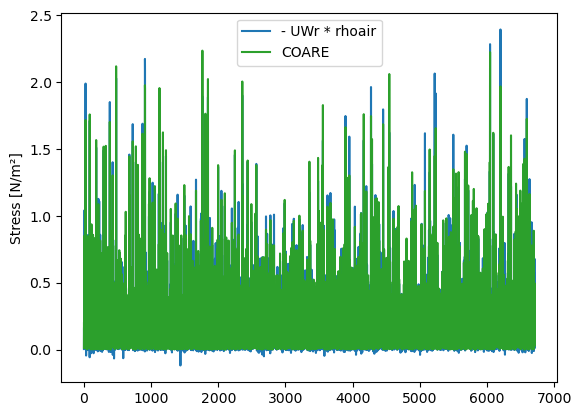

In [34]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

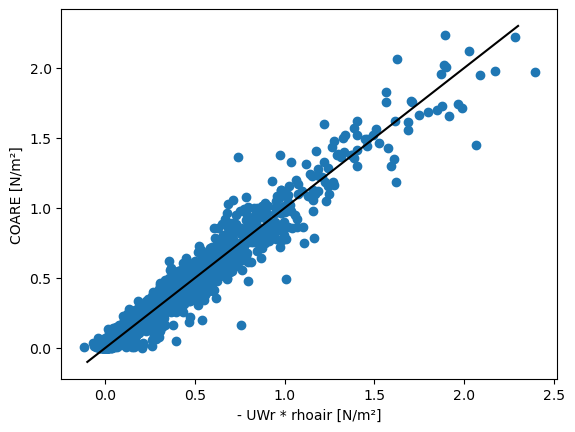

In [35]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [36]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [37]:
df.shape

(6713, 96)

In [38]:
df.shape[0]*0.8

5370.400000000001

In [39]:
split_idx = int(df.shape[0]*0.8)

### Prepare features and labels

In [40]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft',
    'u10', 'v10',
    'sigma0_trip_fore_x', 'sigma0_trip_mid_x', 'sigma0_trip_aft_x',
    'sigma0_trip_fore_y', 'sigma0_trip_mid_y', 'sigma0_trip_aft_y',
    'sigma0_trip_fore_mean3x3', 'sigma0_trip_mid_mean3x3', 'sigma0_trip_aft_mean3x3'
]

In [41]:
x = df[predictor_variables]
x

,sigma0_trip_fore,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,u10,v10,sigma0_trip_fore_x,sigma0_trip_mid_x,sigma0_trip_aft_x,sigma0_trip_fore_y,sigma0_trip_mid_y,sigma0_trip_aft_y,sigma0_trip_fore_mean3x3,sigma0_trip_mid_mean3x3,sigma0_trip_aft_mean3x3
0,-23.692396,-19.716181,-23.761959,54.949997,100.769997,146.470001,48.789997,37.829998,48.779999,-5.958139,-1.545760,0.580929,2.388872,3.084324,-2.821222,-0.960644,-1.710934,-23.468800,-19.921255,-23.608553
1,-21.523678,-17.208441,-15.873583,71.339996,115.869995,160.309998,52.719997,41.770000,52.549999,8.971909,-4.344576,-2.269865,0.860500,-0.902723,1.125799,3.051105,1.752131,-21.635166,-17.551456,-16.258373
2,-15.948977,-8.738081,-16.258532,67.699997,112.379997,156.949997,37.180000,27.869999,37.009998,3.032828,-0.430503,0.338940,0.398772,0.598228,1.453727,0.837183,0.599088,-15.916733,-8.957937,-16.119785
4,-18.624861,-16.817167,-21.128984,-25.539999,-70.320000,-115.079994,46.989998,36.419998,47.000000,1.774315,-0.606478,3.930861,1.746998,6.407451,-9.000047,-6.993793,-5.685732,-14.257282,-12.699898,-15.541332
5,-21.866816,-23.372932,-22.020554,100.769997,56.149998,11.610000,61.559998,50.450001,61.439999,8.546311,7.035079,2.799013,2.568876,1.005390,0.410275,-2.778847,-2.706682,-22.299492,-23.326365,-22.469748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6788,-18.994911,-14.778746,-20.393463,-34.809998,-80.799995,-126.799995,53.820000,42.360001,53.639999,13.453721,6.503223,1.426809,-2.205329,-4.546013,-0.672461,0.432261,1.402555,-19.016619,-14.663075,-20.454111
6789,-21.509340,-18.463285,-16.534340,49.649998,96.159996,142.500000,62.919998,51.419998,62.949997,-4.810270,17.208559,0.272501,1.182877,1.024220,1.269001,-0.478813,-0.327351,-21.364321,-18.377037,-16.504398
6790,-22.868994,-17.679859,-20.473143,106.619995,61.910000,17.100000,45.549999,35.090000,45.509998,-8.257064,9.131248,15.859289,11.226525,10.628944,-8.863070,-8.802871,-10.382540,-21.969227,-16.789581,-19.362862
6791,-18.350641,-18.557043,-23.477961,-24.510000,-69.269997,-114.119995,60.549999,49.480000,60.639999,1.450890,-3.203395,-1.088120,-2.438103,-0.648809,-1.741302,-1.811386,-3.346643,-18.168457,-18.205040,-23.426067


In [42]:
y = - df['UWr'] * df['rhoair']
y

0       0.004143
1       0.163965
2       0.057230
4       0.073337
5       0.077819
          ...   
6788    0.162904
6789    0.239322
6790    0.028252
6791    0.109268
6792    0.570802
Length: 6713, dtype: float64

In [43]:
for c in x.columns:
    if x[c].isna().sum()>0:
        print(c)

In [44]:
y.isna().sum()

0

In [45]:
c = df['stress']

In [46]:
df.shape[0]*0.8

5370.400000000001

In [47]:
split_idx = int(df.shape[0]*0.8)

In [48]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [49]:
c = df['stress']

In [50]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [51]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [52]:
c_train = c[:split_idx]
c_test = c[split_idx:]

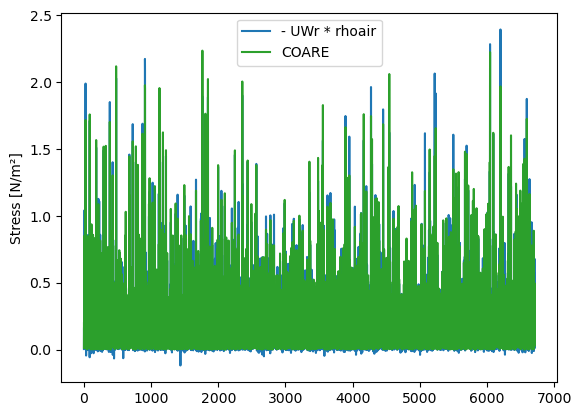

In [53]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [54]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

In [55]:
x_train_std

array([  5.28065249,   5.12017444,   5.30538934,  79.31353344,
        80.50165896, 103.70252282,   7.54663042,   7.02889166,
         7.5535907 ,   5.37784915,   5.40802391,  41.16660754,
         5.41973702,  29.45571249,  50.33701484,  50.35218975,
        58.2019421 ,  11.76242252,   4.74704907,   8.88285832])

In [56]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [57]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


In [58]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500


2023-09-08 07:50:07.286834: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-09-08 07:50:07.287128: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-09-08 07:50:07.287136: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-09-08 07:50:07.287153: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-4l5jvp3-bn-compute): /proc/driver/nvidia/version does not exist
2023-09-08 07:50:07.287307: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

8/8 [==============================] - 1s 88ms/step - loss: 10.4610 - mean_absolute_error: 2.1252 - val_loss: 0.9446 - val_mean_absolute_error: 0.6600
Epoch 2/500
8/8 [==============================] - 0s 38ms/step - loss: 2.2383 - mean_absolute_error: 1.1025 - val_loss: 0.8234 - val_mean_absolute_error: 0.5808
Epoch 3/500
8/8 [==============================] - 0s 35ms/step - loss: 1.3168 - mean_absolute_error: 0.7938 - val_loss: 0.7060 - val_mean_absolute_error: 0.5029
Epoch 4/500
8/8 [==============================] - 0s 32ms/step - loss: 1.0236 - mean_absolute_error: 0.7220 - val_loss: 0.7352 - val_mean_absolute_error: 0.5103
Epoch 5/500
8/8 [==============================] - 0s 31ms/step - loss: 0.9230 - mean_absolute_error: 0.6696 - val_loss: 0.7268 - val_mean_absolute_error: 0.5076
Epoch 6/500
8/8 [==============================] - 0s 31ms/step - loss: 0.8657 - mean_absolute_error: 0.6326 - val_loss: 0.6959 - val_mean_absolute_error: 0.4843
Epoch 7/500
8/8 [======================

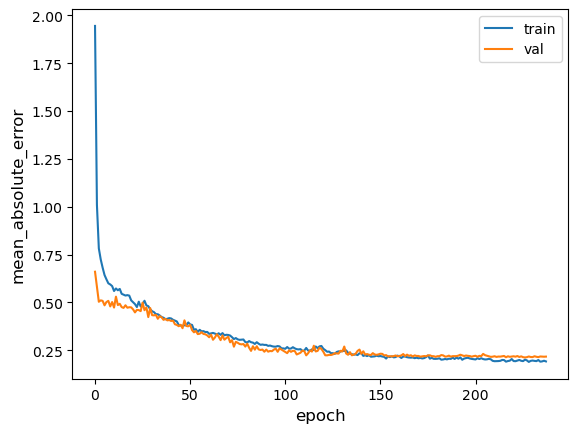

42/42 [==============================] - 0s 2ms/step - loss: 0.1993 - mean_absolute_error: 0.2308
Test accuracy 0.23076562583446503
Test loss 0.1992645412683487


In [59]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [60]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [61]:
rmse(y_test.values, y_test_pred)

0.3286779735631302

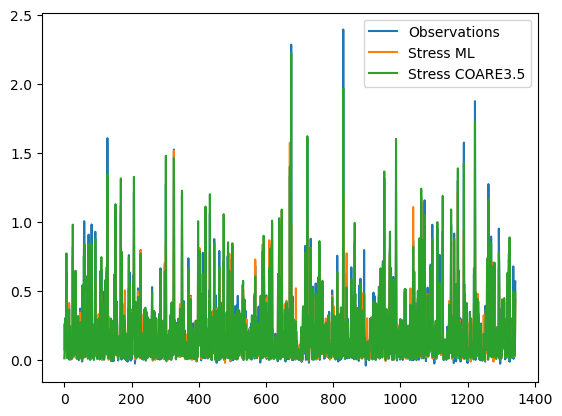

In [62]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

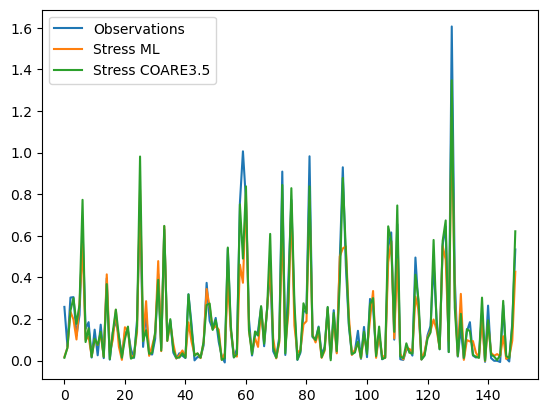

In [63]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [64]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.92072497],
       [0.92072497, 1.        ]])

In [65]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98016417],
       [0.98016417, 1.        ]])

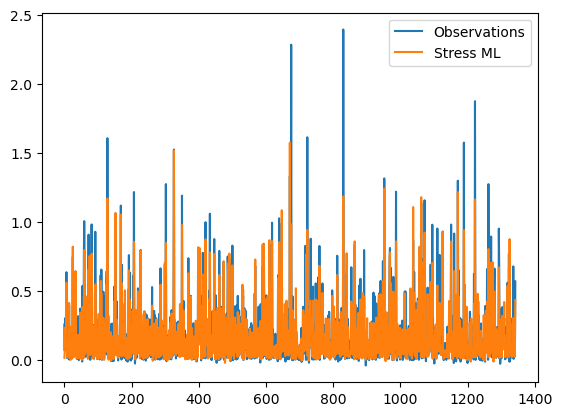

In [66]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [67]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.98016417],
       [0.98016417, 1.        ]])

In [68]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3286779735631302

### plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

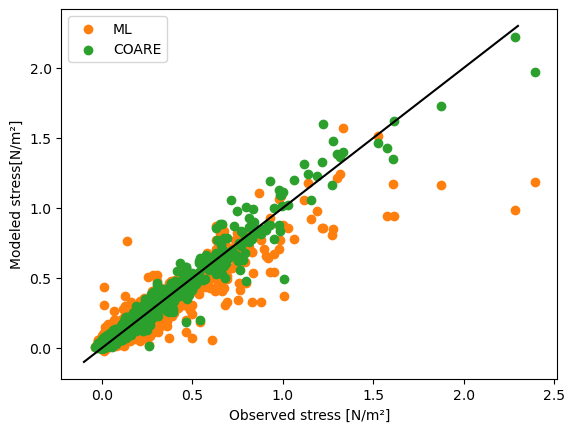

In [69]:
plt.scatter(y_test.values, y_test_pred, label='ML', color='C1')
plt.scatter(y_test.values, c_test.values, label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

# ML setup

In [70]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [71]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

# First experiment - Linear regression

In [72]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
118/118 [==============================] - 0s 1ms/step - loss: 3.7679 - mean_absolute_error: 1.4217 - val_loss: 2.4505 - val_mean_absolute_error: 1.1295
Epoch 2/500
118/118 [==============================] - 0s 778us/step - loss: 2.1780 - mean_absolute_error: 1.0568 - val_loss: 1.6566 - val_mean_absolute_error: 0.8963
Epoch 3/500
118/118 [==============================] - 0s 733us/step - loss: 1.4675 - mean_absolute_error: 0.8459 - val_loss: 1.2105 - val_mean_absolute_error: 0.7335
Epoch 4/500
118/118 [==============================] - 0s 714us/step - loss: 2.3714 - mean_absolute_error: 0.7336 - val_loss: 0.9559 - val_mean_absolute_error: 0.6251
Epoch 5/500
118/118 [==============================] - 0s 706us/step - loss: 1.5350 - mean_absolute_error: 0.6335 - val_loss: 0.8010 - val_mean_absolute_error: 0.5558
Epoch 6/500
118/118 [==============================] - 0s 684us/step - loss: 1.2452 - mean_absolute_error: 0.5706 - val_loss: 0.7106 - val_mean_absolute_error: 0.5211


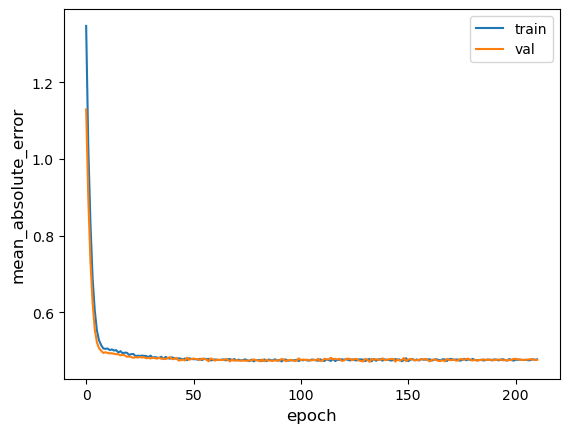

42/42 [==============================] - 0s 421us/step - loss: 0.6512 - mean_absolute_error: 0.4975
Test accuracy 0.4975384473800659
Test loss 0.6511508822441101


In [73]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [74]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [75]:
np.mean(y_test)

0.18943593386065863

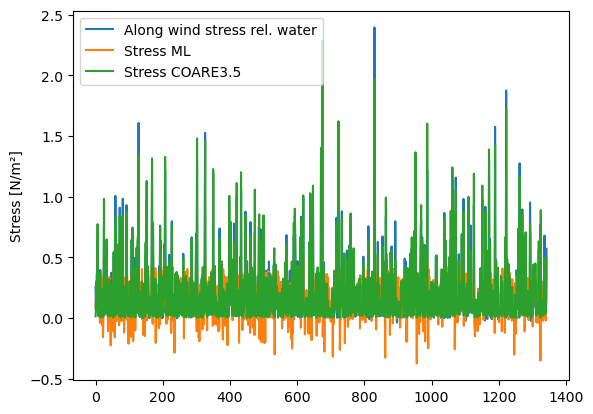

In [76]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

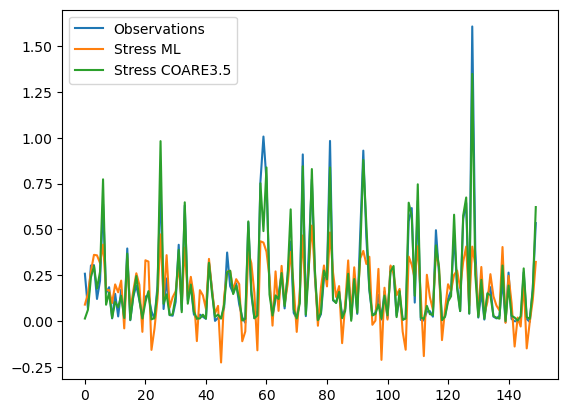

In [77]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

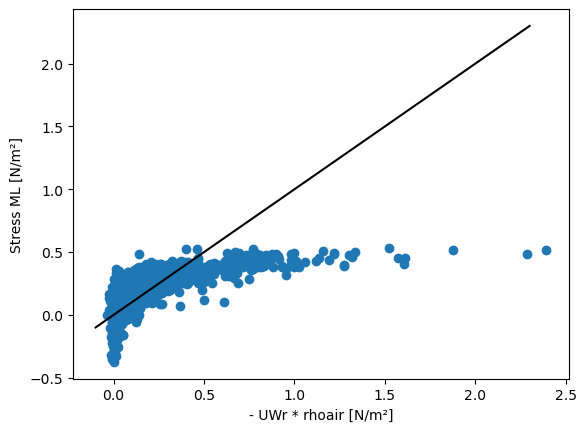

In [78]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

Text(0, 0.5, 'COARE [N/m²]')

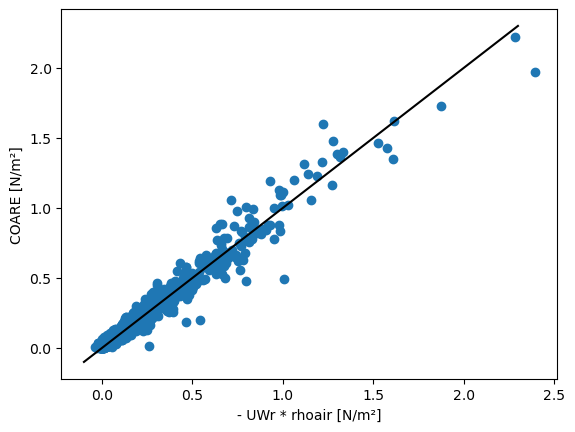

In [79]:
plt.scatter(y_test.values, c_test.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [80]:
rmse(y_test.values, y_test_pred)

0.29818674677021756

In [81]:
rmse(y_test.values, c_test)

0.05068893612983414

## Correlation

In [82]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.67706415],
       [0.67706415, 1.        ]])

In [83]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98016417],
       [0.98016417, 1.        ]])

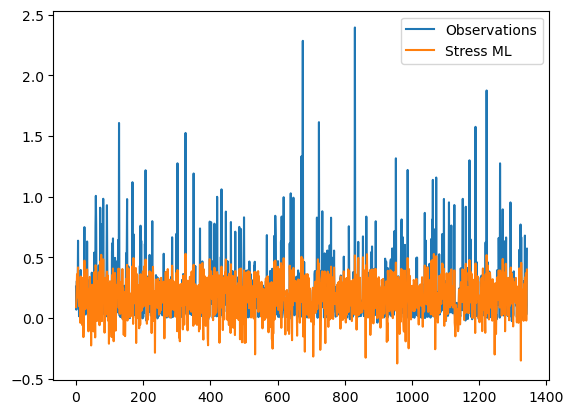

In [84]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [85]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.67706415],
       [0.67706415, 1.        ]])

In [86]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.98016417],
       [0.98016417, 1.        ]])

In [87]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.29818674677021756

## Correlation

In [88]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.67706415],
       [0.67706415, 1.        ]])

In [89]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98016417],
       [0.98016417, 1.        ]])

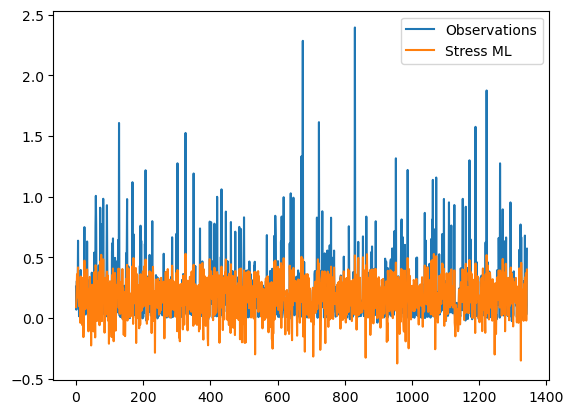

In [90]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [91]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.67706415],
       [0.67706415, 1.        ]])

In [92]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.98016417],
       [0.98016417, 1.        ]])

In [93]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.29818674677021756

# Other experiments

In [94]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [95]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [96]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
118/118 [==============================] - 1s 2ms/step - loss: 1.5315 - mean_absolute_error: 0.9015 - val_loss: 0.8164 - val_mean_absolute_error: 0.5001
Epoch 2/500
118/118 [==============================] - 0s 1ms/step - loss: 0.7970 - mean_absolute_error: 0.6421 - val_loss: 0.7082 - val_mean_absolute_error: 0.4429
Epoch 3/500
118/118 [==============================] - 0s 1ms/step - loss: 0.6155 - mean_absolute_error: 0.5696 - val_loss: 0.8051 - val_mean_absolute_error: 0.3995
Epoch 4/500
118/118 [==============================] - 0s 1ms/step - loss: 0.6294 - mean_absolute_error: 0.5389 - val_loss: 0.6666 - val_mean_absolute_error: 0.3899
Epoch 5/500
118/118 [==============================] - 0s 1ms/step - loss: 0.4952 - mean_absolute_error: 0.4853 - val_loss: 0.5332 - val_mean_absolute_error: 0.3483
Epoch 6/500
118/118 [==============================] - 0s 1ms/step - loss: 0.4027 - mean_absolute_error: 0.4413 - val_loss: 0.5132 - val_mean_absolute_error: 0.3418
Epoch 7/50

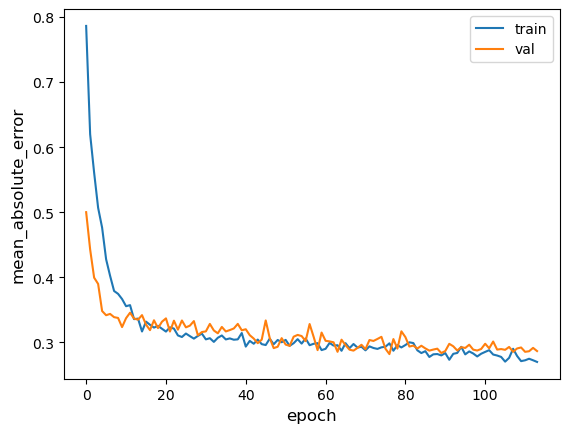

42/42 [==============================] - 0s 420us/step - loss: 0.4297 - mean_absolute_error: 0.3149
Test accuracy 0.31488433480262756
Test loss 0.42971310019493103


In [97]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [98]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [99]:
rmse(y_test.values, y_test_pred)

0.3132068526070259

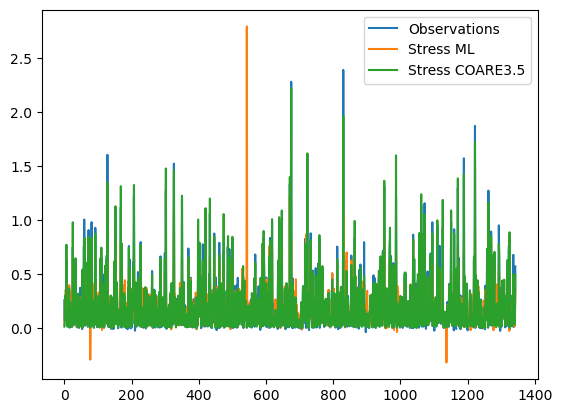

In [100]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

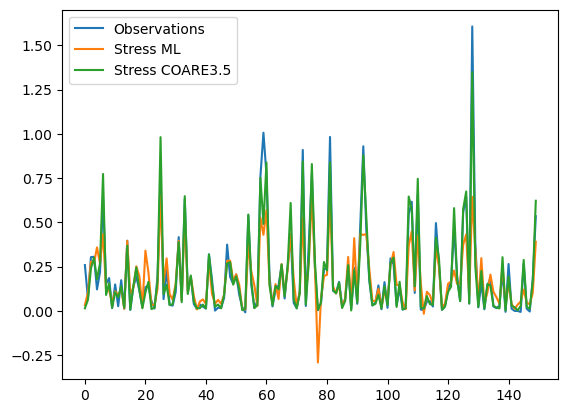

In [101]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

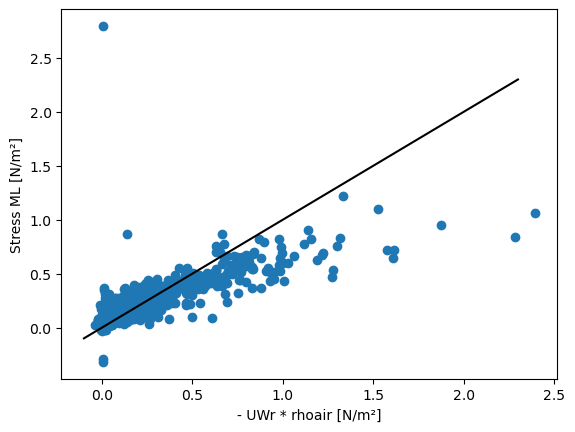

In [102]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [103]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.80435939],
       [0.80435939, 1.        ]])

In [104]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98016417],
       [0.98016417, 1.        ]])

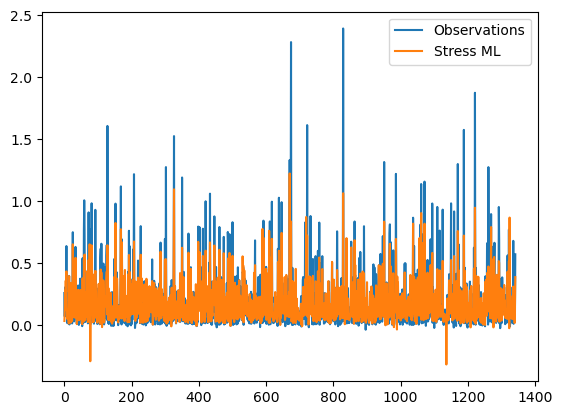

In [105]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [106]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2.5], c_test.values[y_test_pred[:, 0] < 2.5])

array([[1.        , 0.98015662],
       [0.98015662, 1.        ]])

In [107]:
rmse(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])

0.3050979828960341

Text(0, 0.5, 'Stress ML [N/m²]')

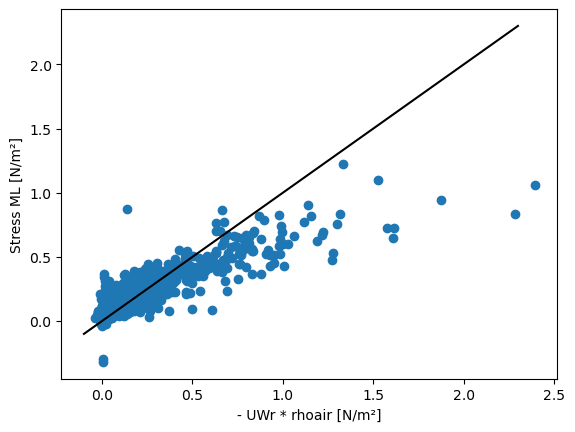

In [108]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [109]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.80435939],
       [0.80435939, 1.        ]])

In [110]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98016417],
       [0.98016417, 1.        ]])

In [111]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [112]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [113]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
118/118 [==============================] - 1s 5ms/step - loss: 3.1377 - mean_absolute_error: 1.2905 - val_loss: 0.9174 - val_mean_absolute_error: 0.5438
Epoch 2/500
118/118 [==============================] - 0s 4ms/step - loss: 0.9836 - mean_absolute_error: 0.6991 - val_loss: 0.6955 - val_mean_absolute_error: 0.4522
Epoch 3/500
118/118 [==============================] - 0s 4ms/step - loss: 0.6340 - mean_absolute_error: 0.5750 - val_loss: 0.5200 - val_mean_absolute_error: 0.4213
Epoch 4/500
118/118 [==============================] - 0s 4ms/step - loss: 0.5120 - mean_absolute_error: 0.5185 - val_loss: 0.5114 - val_mean_absolute_error: 0.4437
Epoch 5/500
118/118 [==============================] - 0s 4ms/step - loss: 0.4652 - mean_absolute_error: 0.4835 - val_loss: 0.4642 - val_mean_absolute_error: 0.3853
Epoch 6/500
118/118 [==============================] - 0s 4ms/step - loss: 0.3926 - mean_absolute_error: 0.4435 - val_loss: 0.3978 - val_mean_absolute_error: 0.3737
Epoch 7/50

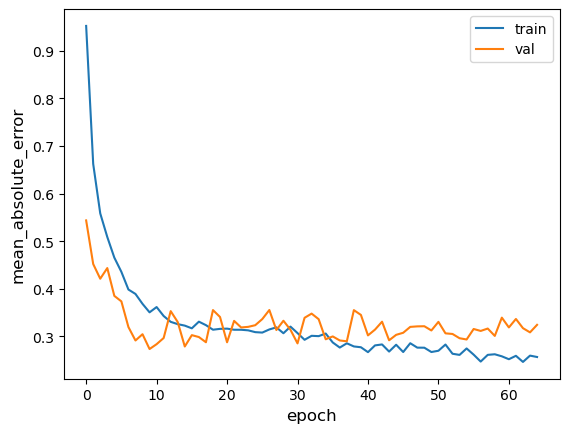

42/42 [==============================] - 0s 817us/step - loss: 0.4564 - mean_absolute_error: 0.3639
Test accuracy 0.3638601005077362
Test loss 0.4564332664012909


In [114]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [115]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [116]:
rmse(y_test.values, y_test_pred)

0.28872826055883344

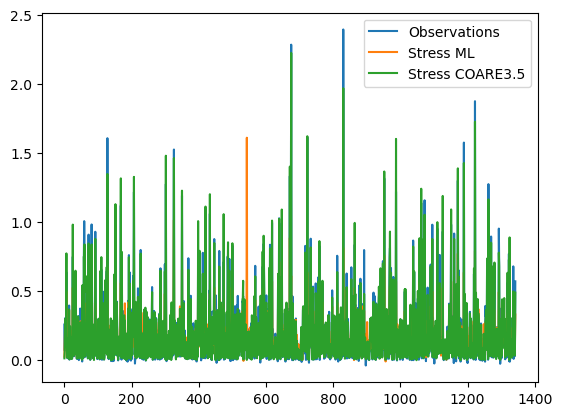

In [117]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

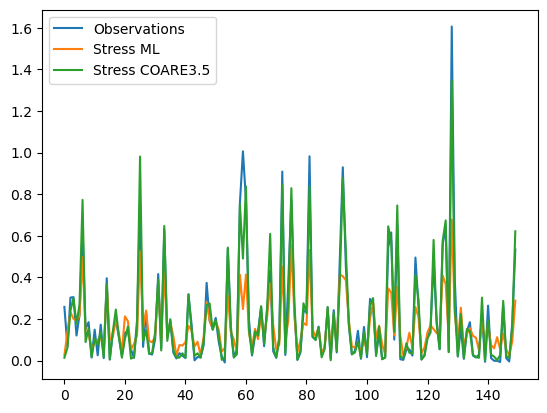

In [118]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [119]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.85623126],
       [0.85623126, 1.        ]])

In [120]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98016417],
       [0.98016417, 1.        ]])

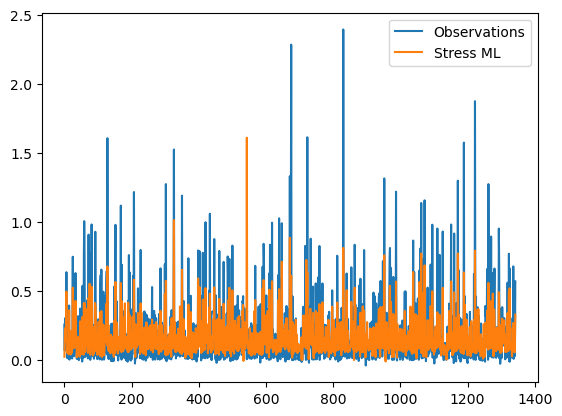

In [121]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [122]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.98016417],
       [0.98016417, 1.        ]])

In [123]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.28872826055883344

Text(0, 0.5, 'Stress ML [N/m²]')

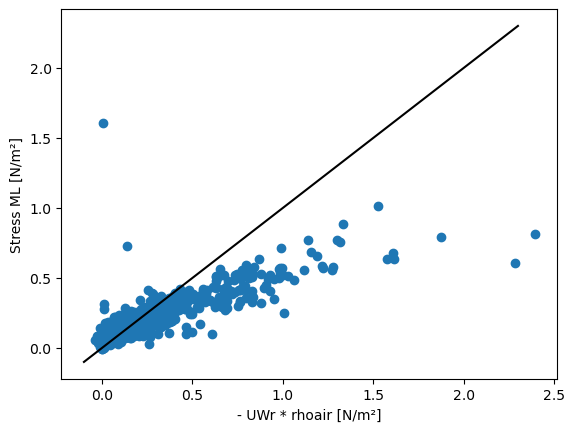

In [124]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [125]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [126]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [127]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
118/118 [==============================] - 2s 12ms/step - loss: 3.3847 - mean_absolute_error: 1.2780 - val_loss: 0.8121 - val_mean_absolute_error: 0.6275
Epoch 2/500
118/118 [==============================] - 1s 11ms/step - loss: 0.8311 - mean_absolute_error: 0.6788 - val_loss: 0.7554 - val_mean_absolute_error: 0.5523
Epoch 3/500
118/118 [==============================] - 1s 11ms/step - loss: 0.6685 - mean_absolute_error: 0.5927 - val_loss: 0.6434 - val_mean_absolute_error: 0.5117
Epoch 4/500
118/118 [==============================] - 1s 11ms/step - loss: 0.6226 - mean_absolute_error: 0.5459 - val_loss: 0.4344 - val_mean_absolute_error: 0.3771
Epoch 5/500
118/118 [==============================] - 1s 11ms/step - loss: 0.4619 - mean_absolute_error: 0.4731 - val_loss: 0.2933 - val_mean_absolute_error: 0.3362
Epoch 6/500
118/118 [==============================] - 1s 11ms/step - loss: 0.4110 - mean_absolute_error: 0.4509 - val_loss: 0.3029 - val_mean_absolute_error: 0.3119
Epoc

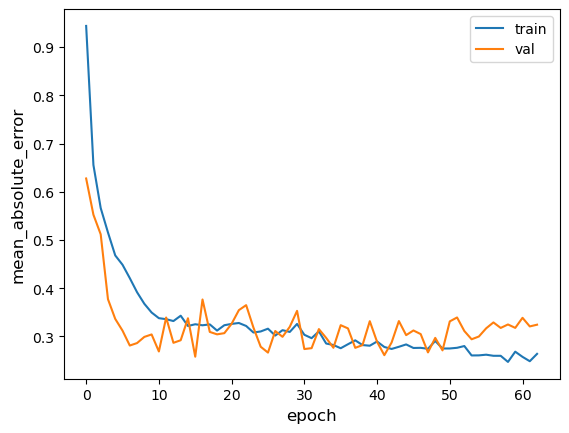

42/42 [==============================] - 0s 2ms/step - loss: 0.3622 - mean_absolute_error: 0.3512
Test accuracy 0.35124826431274414
Test loss 0.36215174198150635


In [128]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [129]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [130]:
rmse(y_test.values, y_test_pred)

0.29214451796940294

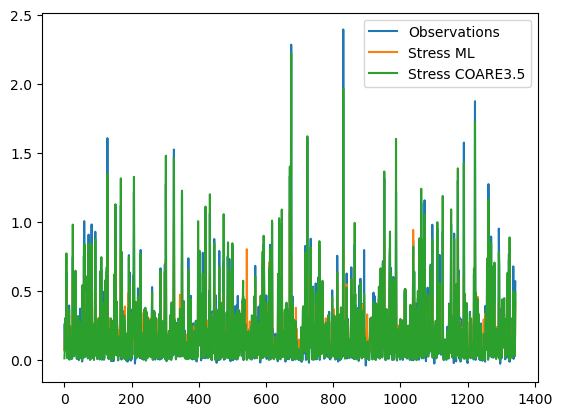

In [131]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

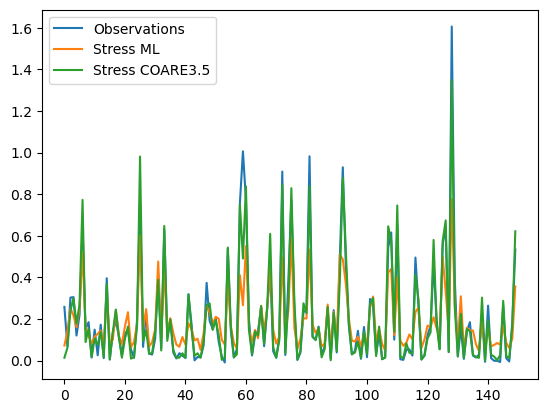

In [132]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [133]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.89888557],
       [0.89888557, 1.        ]])

In [134]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98016417],
       [0.98016417, 1.        ]])

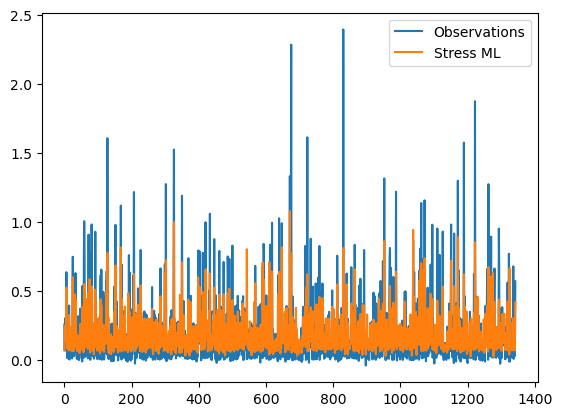

In [135]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [136]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.98016417],
       [0.98016417, 1.        ]])

In [137]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.29214451796940294

Text(0, 0.5, 'Stress ML [N/m²]')

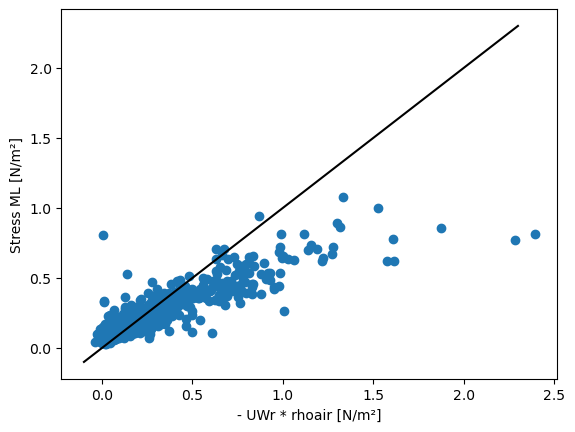

In [138]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

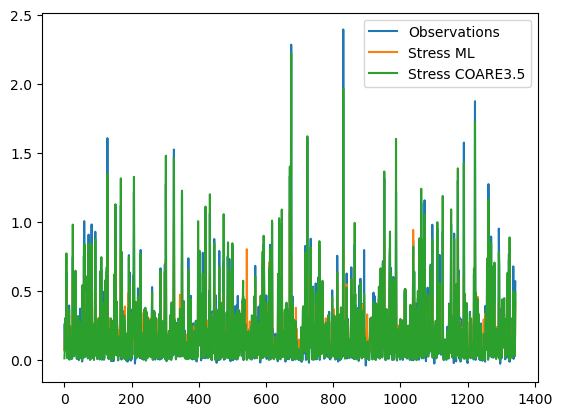

In [139]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -0.5], label='Stress COARE3.5')
plt.legend()

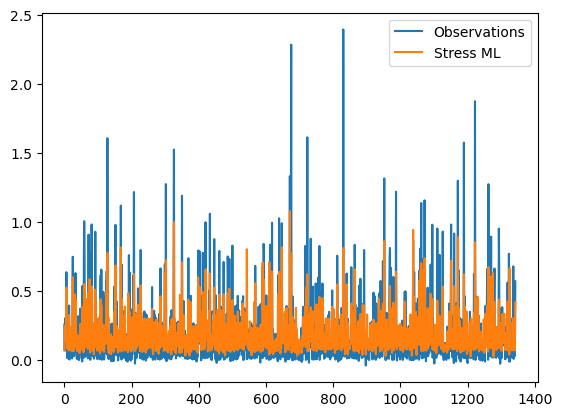

In [140]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.legend()

In [141]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5, 0])

array([[1.        , 0.89888557],
       [0.89888557, 1.        ]])

In [142]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], c_test.values[y_test_pred[:, 0] > -0.5])

array([[1.        , 0.98016417],
       [0.98016417, 1.        ]])

In [143]:
rmse(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])

0.29214451796940294

Text(0, 0.5, 'Stress ML [N/m²]')

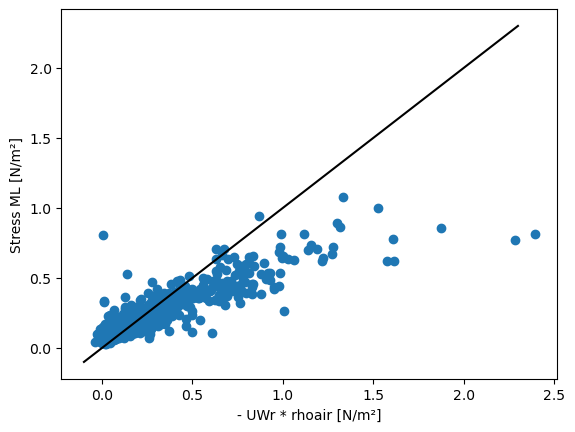

In [144]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [145]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [146]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [147]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
8/8 [==============================] - 1s 44ms/step - loss: 12.9067 - mean_absolute_error: 2.4302 - val_loss: 0.8449 - val_mean_absolute_error: 0.5902
Epoch 2/500
8/8 [==============================] - 0s 29ms/step - loss: 2.6151 - mean_absolute_error: 1.1262 - val_loss: 0.8100 - val_mean_absolute_error: 0.5518
Epoch 3/500
8/8 [==============================] - 0s 28ms/step - loss: 1.8736 - mean_absolute_error: 0.8949 - val_loss: 0.8165 - val_mean_absolute_error: 0.5623
Epoch 4/500
8/8 [==============================] - 0s 29ms/step - loss: 1.3017 - mean_absolute_error: 0.7826 - val_loss: 0.7490 - val_mean_absolute_error: 0.5493
Epoch 5/500
8/8 [==============================] - 0s 30ms/step - loss: 0.9894 - mean_absolute_error: 0.6899 - val_loss: 0.7118 - val_mean_absolute_error: 0.4942
Epoch 6/500
8/8 [==============================] - 0s 28ms/step - loss: 0.9795 - mean_absolute_error: 0.6593 - val_loss: 0.7742 - val_mean_absolute_error: 0.5439
Epoch 7/500
8/8 [==========

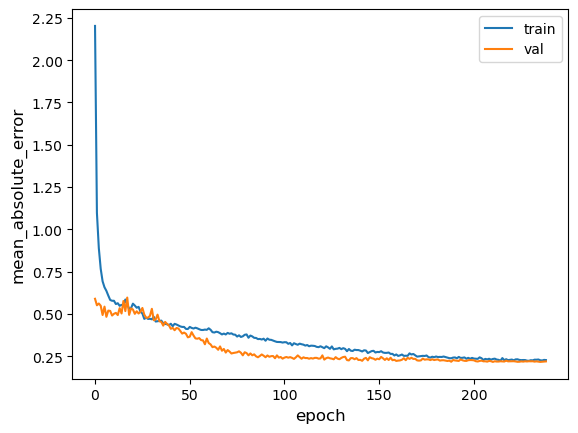

42/42 [==============================] - 0s 2ms/step - loss: 0.1979 - mean_absolute_error: 0.2364
Test accuracy 0.2364344745874405
Test loss 0.19790038466453552


In [148]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [149]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [150]:
rmse(y_test.values, y_test_pred)

0.3272746805046742

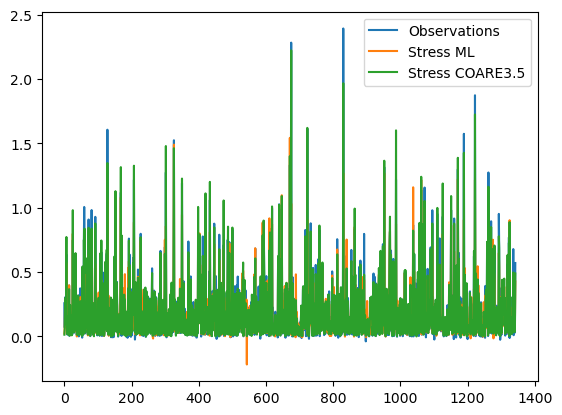

In [151]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

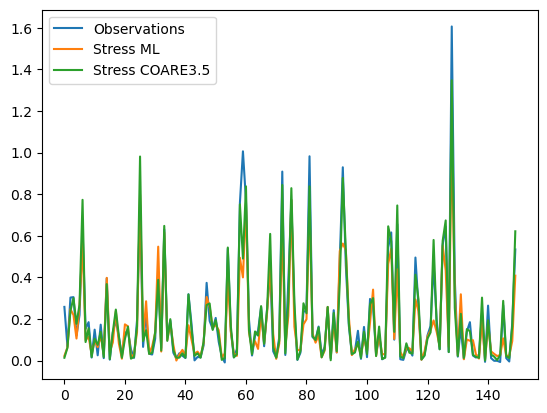

In [152]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [153]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.9232956],
       [0.9232956, 1.       ]])

In [154]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98016417],
       [0.98016417, 1.        ]])

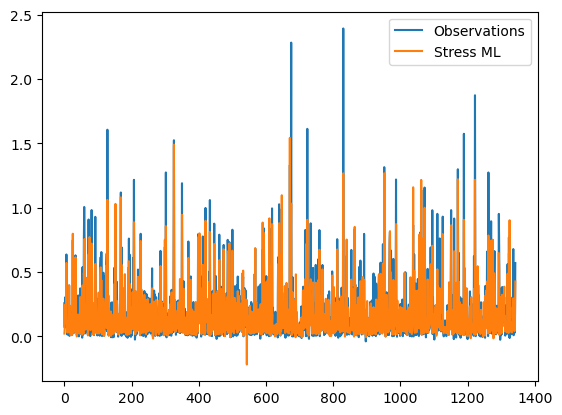

In [155]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [156]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.98016417],
       [0.98016417, 1.        ]])

In [157]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3272746805046742

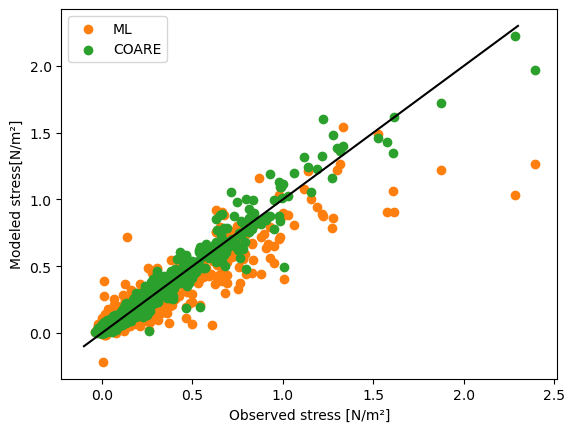

In [158]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

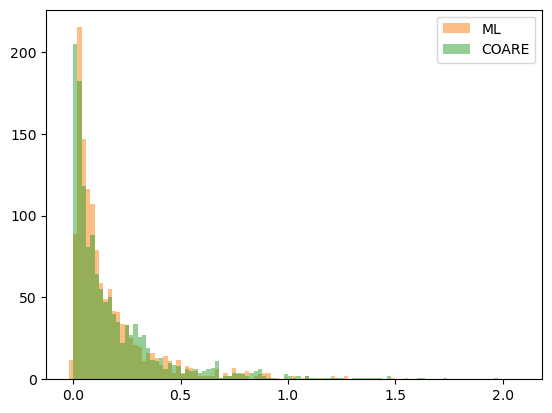

In [159]:
plt.hist(y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02)  )
plt.hist(c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02) )
plt.legend()

# Best model

In [160]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [161]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [162]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
8/8 [==============================] - 1s 44ms/step - loss: 12.4071 - mean_absolute_error: 2.3628 - val_loss: 0.9811 - val_mean_absolute_error: 0.6311
Epoch 2/500
8/8 [==============================] - 0s 29ms/step - loss: 2.1807 - mean_absolute_error: 1.0600 - val_loss: 0.9766 - val_mean_absolute_error: 0.6408
Epoch 3/500
8/8 [==============================] - 0s 29ms/step - loss: 2.0225 - mean_absolute_error: 0.9208 - val_loss: 0.8847 - val_mean_absolute_error: 0.6226
Epoch 4/500
8/8 [==============================] - 0s 29ms/step - loss: 1.7931 - mean_absolute_error: 0.7571 - val_loss: 0.9235 - val_mean_absolute_error: 0.6369
Epoch 5/500
8/8 [==============================] - 0s 29ms/step - loss: 1.2048 - mean_absolute_error: 0.7133 - val_loss: 0.8962 - val_mean_absolute_error: 0.5718
Epoch 6/500
8/8 [==============================] - 0s 29ms/step - loss: 1.0926 - mean_absolute_error: 0.6541 - val_loss: 0.8744 - val_mean_absolute_error: 0.6243
Epoch 7/500
8/8 [==========

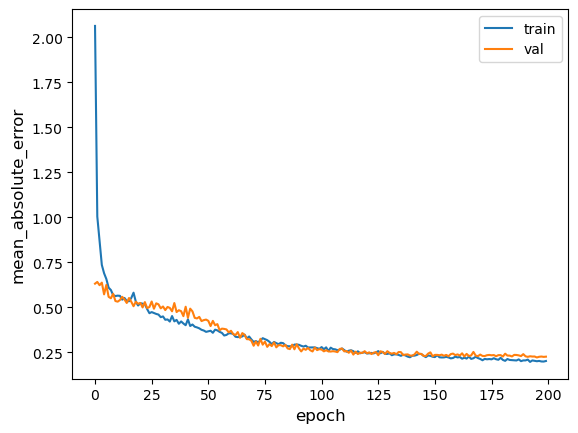

42/42 [==============================] - 0s 2ms/step - loss: 0.2187 - mean_absolute_error: 0.2426
Test accuracy 0.2425793707370758
Test loss 0.21871866285800934


In [163]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [164]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [165]:
rmse(y_test.values, y_test_pred)

0.31991127993768115

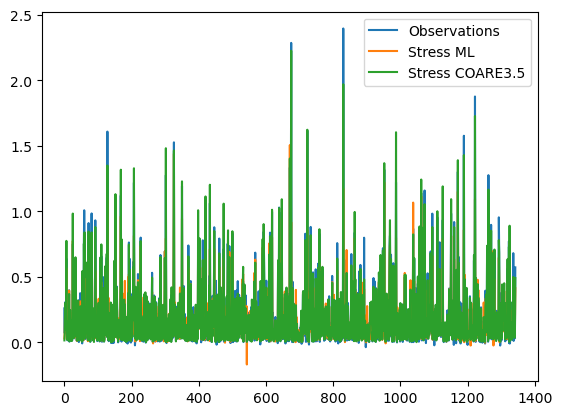

In [166]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

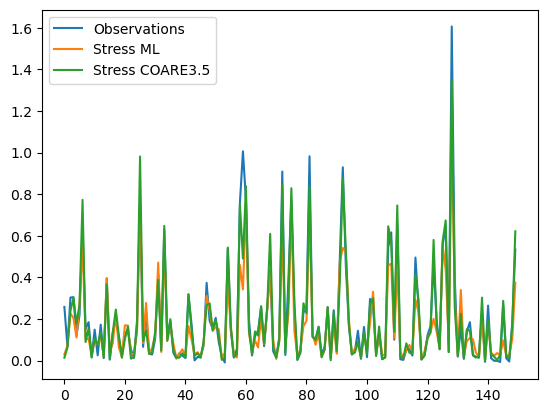

In [167]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [168]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.92304079],
       [0.92304079, 1.        ]])

In [169]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98016417],
       [0.98016417, 1.        ]])

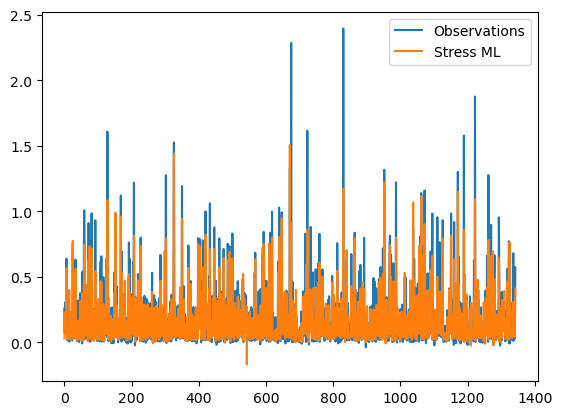

In [170]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [171]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.98016417],
       [0.98016417, 1.        ]])

In [172]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.31991127993768115

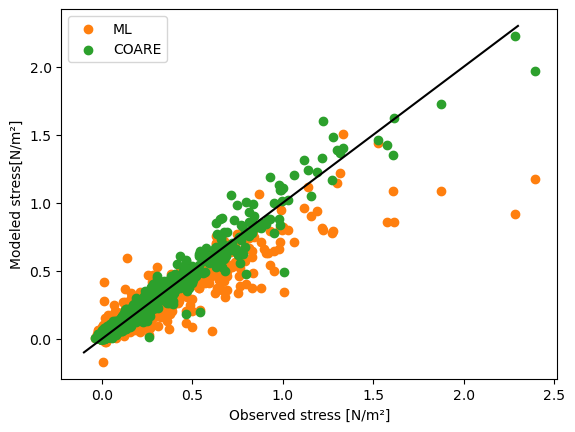

In [173]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

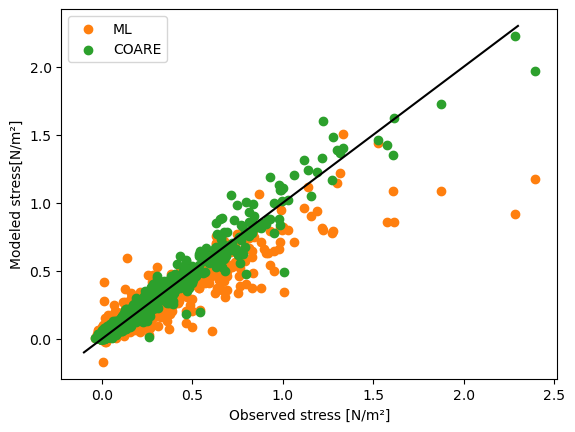

In [174]:
plt.scatter(y_test.values, y_test_pred, label='ML', color='C1')
plt.scatter(y_test.values, c_test.values, label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()